**Authors:** Jozef Hanč, Dominik Borovský <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Generating quadruple-precision Hake ratio pdf values </font>

<font size=5> Computational tools: </font>  **<font size=5>SageMath</font>** 

---

## Sage procedures and functions

In [1]:
# python libraries
import numpy as np
import pandas as pd
from numpy import array as v
from io import StringIO
from time import time

import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('seaborn-whitegrid')

load('TR_DE_Cheb/runtime.py')

In [2]:
# approximate formulas for precisions expressed in bits and decimal places
bits = lambda d:round((d+1)*ln(10)/ln(2)) 
dps = lambda b:round(b*ln(2)/ln(10) - 1)

# accuracy in Python
def abs_errs(df1, df2):
    N = len(df1)
    errors = [abs(df1[i]-df2[i]) for i in range(N)]
    return errors

In [3]:
# double precision is 15 decimal places
bits(15)

53

In [4]:
# quadrupole precision is 33 decimal places precisions
bits(33), dps(113)

(113, 33)

# Exact x values - quadrupole precision

In [5]:
# writing x values with quadruple precision
def write_xdata(filename, n, dh, hh, dps = 33):
    f = open(filename,"w")
    RRf = RealField(round((dps+1)*ln(10)/ln(2)) )
    data = [RRf(QQ(dh)+(QQ(hh)-QQ(dh))/(n-1)*(i-1)) for i in [1..n]]
    for item in data:
        print(item, file=f)
    f.close()

## interval SixSigma $(-4.5,7.5)$

The interval for our case of Hake ratio is calculated in Python-HakeRatio-CharFun-Moments.ipynb

In [6]:
# writing x values (quadruple precision) 
xmin, xmax = -9/2,15/2
writing = True
for n in [1..4]:
    tic = time()   # start time
    
    if writing: 
        filename = f'xvalues{10^n}.txt'
        write_xdata('data/'+filename, 10^n,xmin,xmax)
        toc = time()-tic; # end time
        print('10^'+str(n)+' x values: runtime =',toc,'s')

10^1 x values: runtime = 0.0021703243255615234 s
10^2 x values: runtime = 0.0017015933990478516 s
10^3 x values: runtime = 0.00639796257019043 s
10^4 x values: runtime = 0.058821916580200195 s


# Exact pdf values - quadrupole precision

## Analytic form $a=3/2, b=1$

In [7]:
# general definition
a, b = var('a,b')
fk(t) = exp(-(a^2+b^2)/2)/(pi*(1+t^2))
q = (b + a*t)/sqrt(1+t^2)
M(a,b,z) = hypergeometric_M(a,b,z)
# definition of f_T
# formula
assume(a*t+b>0)
fM(t) = fk(t)*(1+q*exp(1/2*q^2)*integral(exp(-1/2*x^2),x, 0, q))
fM.show()

t |--> 1/2*(sqrt(2)*sqrt(pi)*(a*t + b)*erf(1/2*sqrt(2)*(a*t + b)/sqrt(t^2 + 1))*e^(1/2*(a*t + b)^2/(t^2 + 1))/sqrt(t^2 + 1) + 2)*e^(-1/2*a^2 - 1/2*b^2)/(pi*(t^2 + 1))

In [8]:
h(t) = (sqrt(2*pi)*(a*t + b)*erf(1/2*sqrt(2)*(a*t + b)/sqrt(t^2 + 1))*e^(1/2*(a*t + b)^2/(t^2 + 1))/sqrt(t^2 + 1) + 2)/2
fT(t) = fk(t)*h(t)

In [9]:
# cross-check
(fM(t)-fT(t)).canonicalize_radical()

0

In [10]:
av, bv = 3/2, 1

In [11]:
def fTab(t, a=av, b =bv):
    return fT(t).subs(a=av, b=bv)
fTab(t).show()

1/4*(sqrt(2)*sqrt(pi)*(3*t + 2)*erf(1/4*sqrt(2)*(3*t + 2)/sqrt(t^2 + 1))*e^(1/8*(3*t + 2)^2/(t^2 + 1))/sqrt(t^2 + 1) + 4)*e^(-13/8)/(pi*(t^2 + 1))

In [12]:
fTab(1).show()
fTab(1).n()

1/8*(5*sqrt(pi)*erf(5/4)*e^(25/16) + 4)*e^(-13/8)/pi

0.337054208947151

In [13]:
# fTab quadrupole precision
dps = 33
RRf = RealField(round((dps+1)*ln(10)/ln(2)) )
RRf(fTab(1))

0.337054208947151326597489182171496

In [14]:
# generating Marsaglia pdf with quadruple precision
def sage_data(n, dh, hh, dps = 33):
    RRf = RealField(round((dps+1)*ln(10)/ln(2)) )
    xdata = [RRf(QQ(dh)+(QQ(hh)-QQ(dh))/(n-1)*(i-1)) for i in [1..n]]
    ydata = [RRf(fTab(xv)) for xv in xdata]
    return ydata

def write_sage_data(filename, n, dh, hh):
    f = open(filename,"w")
    data = sage_data(n,dh,hh, dps=33)
    for item in data:
        print(item, file=f)
    f.close()

In [15]:
data = sage_data(100, xmin, xmax)
data[-1]-RRf(fTab(15/2))

0.000000000000000000000000000000000

In [16]:
# writing 10^n pdf values in files
writing = False
for n in [1..4]:
    tic = time()   # start time
    
    if writing:
        filename = f'Sage_QPpdf{10^n}.txt'
        write_sage_data('data/'+filename, 10^n,xmin,xmax)
        toc = time()-tic; # end time
        print('10^'+str(n)+' values: runtime =',toc,'s')

In [17]:
fTfast = fast_float(fTab(t),t)

In [18]:
rtf = runtime('fTfast(1)')

573 ns ± 9.26 ns per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [19]:
rt = runtime('fTab(1).n()')

436 µs ± 15.1 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [20]:
rtf.average, rt.average

(5.728333489969372e-07, 0.0004363721666547159)

In [21]:
rt.average/rtf.average

761.7785651251409

## Fast SageMath Computation - 1000 points

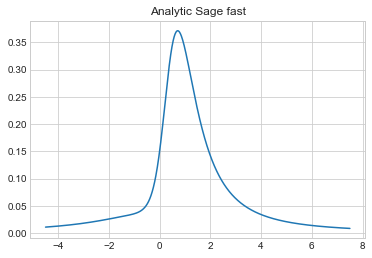

In [22]:
methods = {'Analytic Sage fast':fTfast}
pdf = {m:f for m,f in methods.items()}

points = np.linspace(xmin, xmax, 1000)

for method in list(pdf.keys()):
    yh = [pdf[method](u) for u in points]
    plt.plot(points,yh)
    
plt.title(method)
plt.show();

In [23]:
N = 3
rmin, rmax = -9/2,15/2

In [24]:
import pandas as pd

In [25]:
# exponents -3, ... , -15
benchmark = pd.DataFrame(index = range(3, 16), 
            columns = methods.keys())
benchmark.insert(0r, 'err', v([f"{10r^(-n):.0e}" for n in range(3, 16)]))

In [26]:
benchmark

,err,Analytic Sage fast
3,1e-03,NaN
4,1e-04,NaN
5,1e-05,NaN
6,1e-06,NaN
7,1e-07,NaN
8,1e-08,NaN
9,1e-09,NaN
10,1e-10,NaN
11,1e-11,NaN
12,1e-12,NaN


In [27]:
# points
x = lambda n: np.linspace(rmin, rmax, n)
# pre-calculated all values for 10^n points
dx = {str(10**(n+1)):np.loadtxt(f'data/xvalues{10**(n+1)}.txt', dtype=np.longdouble) for n in range(N)}
dsageQP = {str(10**(n+1)):np.loadtxt(f'data/Sage_QPpdf{10**(n+1)}.txt', dtype=np.longdouble) for n in range(N)}

In [28]:
dx['10'], dsageQP['10']

(array([-4.5       , -3.16666667, -1.83333333, -0.5       ,  0.83333333,
         2.16666667,  3.5       ,  4.83333333,  6.16666667,  7.5       ],
       dtype=float128),
 array([0.01085719, 0.01696408, 0.02719514, 0.05269251, 0.36398372,
        0.1220156 , 0.04536257, 0.02230198, 0.01301465, 0.00846441],
       dtype=float128))

In [29]:
# start time
rp, Np = 3, 100
tic = time()
points = dx[str(10**N)].astype(np.float64)

print('         method      rel eps        rt      drt%     min-err     max-err     geomean     3geostd')

for n in range(3, 16):
    eps = 10**(-n)
    rt = runtime('[fTfast(xh) for xh in points]', r=rp, n=Np, output=False)
    
    dm = [fTfast(xh) for xh in points]
    dp = dsageQP[str(10**N)]
    
    ch_abs = abs_errs(dm,dp)
    # Geometric mean
    ch_abs_adjusted = v(ch_abs) +1e-20
    log_ch_abs = np.log(ch_abs_adjusted)
    geo_mean = np.exp(np.mean(log_ch_abs))
    geo_3sigma = np.exp(3*np.std(log_ch_abs))
    # Geometric standard deviation
    #ch_rel = rel_errs(dm,dp)
    
    benchmark.at[n,method] = [rt.average, 100*rt.stdev/rt.average, min(ch_abs), max(ch_abs),
                             geo_mean, geo_3sigma
                             ] #stdev
    
    print('N =', 10**N, method, ' eps = ', '10^'+str(-n), 
              [f'{num:.2e}' if i != 1 else f'{int(round(num))}%' 
               for i, num in enumerate(benchmark.at[n, method])])
    
    #end time
toc = time()-tic; 
print('runtime =',toc,'s')
print(25*'*')
print('         method      rel eps        rt      drt%     min-err     max-err     geomean     3geostd')

         method      rel eps        rt      drt%     min-err     max-err     geomean     3geostd
N = 1000 Analytic Sage fast  eps =  10^-3 ['5.59e-04', '2%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-4 ['5.47e-04', '1%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-5 ['5.52e-04', '1%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-6 ['5.55e-04', '1%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-7 ['5.46e-04', '2%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-8 ['5.69e-04', '2%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-9 ['5.48e-04', '0%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  eps =  10^-10 ['5.66e-04', '1%', '0.00e+00', '2.78e-16', '6.14e-18', '1.25e+02']
N = 1000 Analytic Sage fast  e

In [30]:
show_allrowscols(benchmark,fullcolwidth=True)

,err,Analytic Sage fast
3,1e-03,"[0.000559288333170116, 1.8575735413553351, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
4,1e-04,"[0.000546501333398434, 1.019149479672302, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
5,1e-05,"[0.0005523506664515783, 1.470400790710571, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
6,1e-06,"[0.0005545353332612042, 0.9966062038858243, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
7,1e-07,"[0.0005460789999536549, 1.627925810193613, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
8,1e-08,"[0.0005691443335187311, 1.8596822751115045, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
9,1e-09,"[0.0005479879999378076, 0.3617046944193996, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
10,1e-10,"[0.0005664313330392664, 0.6228107589649122, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
11,1e-11,"[0.0005484103333825867, 0.5482872722690191, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"
12,1e-12,"[0.0005540893333575999, 1.54771786567703, 0.0, 2.777997016450983736e-16, 6.1360564302084314417e-18, 124.554485877372831296]"


In [31]:
benchmark.to_csv('data/Analytic-Sage-fast.csv', index=False)